# Feature Selection/Extraction and Outlier Detection

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,SelectFromModel
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC

In [9]:
#VarianceThreshold removes all zero-variance features, i.e. features that have the same value in all samples.
X = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1]] #in this exemple it keeps just feature2
t=0.8*(1-0.8)
sel=VarianceThreshold(threshold=t)
X_new=sel.fit_transform(X)
X_new

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [19]:
#Select K Best for iris dataset 
X=load_iris().data
Y=load_iris().target

sel=SelectKBest(chi2, k=2)
X_new=sel.fit_transform(X,Y)
print(X[0],X_new[0])

[5.1 3.5 1.4 0.2] [1.4 0.2]


In [21]:
model=ExtraTreeClassifier(max_depth=3, criterion='gini',random_state=1)
model.fit(X,Y)
print(model.feature_importances_)
sel=SelectFromModel(model,prefit=True)
X_new=sel.transform(X)
print(X[0],X_new[0])

[0.05651    0.         0.62760699 0.315883  ]
[5.1 3.5 1.4 0.2] [1.4 0.2]


In [27]:
model=LinearSVC(C=0.01,penalty='l2')
model.fit(X,Y)
sel=SelectFromModel(model)
X_new=sel.transform(X)
print(X[0],X_new[0])

[5.1 3.5 1.4 0.2] [3.5 1.4]


/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<Axes: >

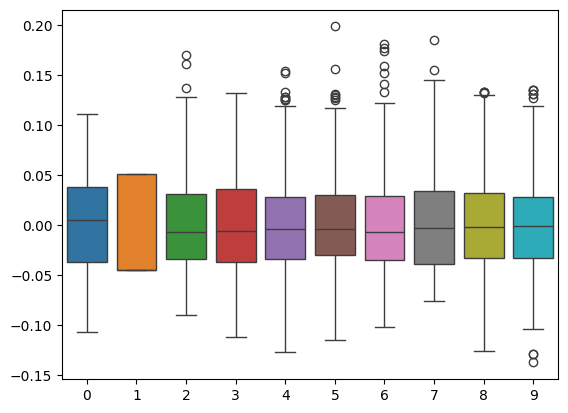

In [63]:
diabetes=load_diabetes()
X=diabetes.data
sns.boxplot(data=X)

In [64]:
def identify_outliers(data, whisker_factor=1.5):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)   
  iqr = q3 - q1
  lower_bound = q1 - whisker_factor * iqr
  upper_bound = q3 + whisker_factor * iqr
  return data[(data < lower_bound) | (data > upper_bound)]

In [70]:
for col in range (0,10):
  outlier_indices = identify_outliers(X[:,col], whisker_factor=1.5)
  print(col,outlier_indices)

0 []
1 []
2 [0.16085492 0.13714305 0.17055523]
3 []
4 [0.15253776 0.13327442 0.12639466 0.15391371 0.12777061 0.1250187
 0.1250187  0.12777061]
5 [0.19878799 0.13146107 0.15588665 0.12801644 0.1251981  0.12739014
 0.13020848]
6 [0.13331777 0.18117906 0.15172596 0.17749742 0.15908923 0.14068104
 0.17381578]
7 [0.18523444 0.15534454]
8 [0.13359728 0.13359728 0.13339674 0.13237579]
9 [ 0.13561183 -0.12948301  0.13561183  0.13146972  0.12732762 -0.12948301
  0.13561183 -0.13776723  0.13146972]


In [80]:
mask=X> 0.18 
X[mask.any(axis=1)]

array([[ 0.04170844, -0.04464164, -0.06440781,  0.03564379,  0.01219057,
        -0.05799375,  0.18117906, -0.0763945 , -0.00061174, -0.05078298],
       [ 0.00538306,  0.05068012,  0.0347509 , -0.00109143,  0.15253776,
         0.19878799, -0.06180903,  0.18523444,  0.01556846,  0.07348023]])